<a href="https://colab.research.google.com/github/DuaIlyas24/DevelopersHub-Task2-Credit-Risk/blob/main/Task2_Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Credit Risk Prediction
**Objective:** To predict loan default status using machine learning classification.
**Dataset:** Loan Prediction Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_prediction.csv"
df = pd.read_csv(url)

# 1. Handle Missing Data (Requirement)
# We fill numerical gaps with the 'mean' and categorical gaps with 'mode'
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Status'] = df['Loan_Status'].fillna(df['Loan_Status'].mode()[0])

print("Missing values handled. Current null count:", df.isnull().sum().sum())

Missing values handled. Current null count: 0


/tmp/ipython-input-497900238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='viridis')


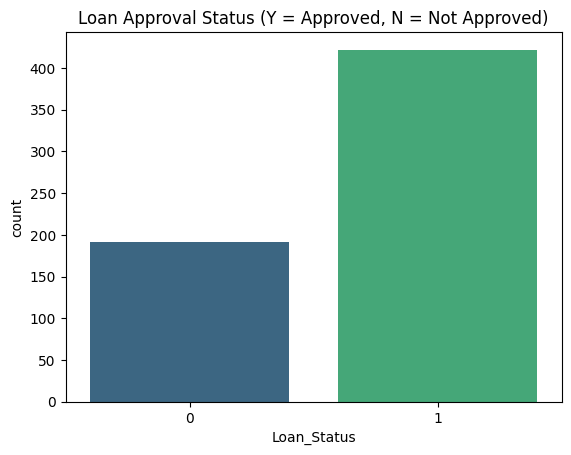

In [2]:
# Visualize Loan Status distribution
sns.countplot(x='Loan_Status', data=df, hue='Loan_Status', palette='viridis', legend=False)
plt.title('Loan Approval Status (Y = Approved, N = Not Approved)')
plt.show()

In [3]:
# Prepare data (Selecting simple numeric features for the model)
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y = df['Loan_Status']

# Split data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy Score: 0.6504065040650406

Confusion Matrix:
 [[ 0 43]
 [ 0 80]]


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Reload the data fresh
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_prediction.csv"
df = pd.read_csv(url)

# 2. Fill Missing Values with simple strings/numbers
df['Credit_History'] = df['Credit_History'].fillna(0) # Assume no history if missing
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# 3. Simple Encoding (Convert Text to Numbers manually)
# This avoids the "KeyError" by using a direct replacement
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})

# 4. Select only the columns we just cleaned
features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Education', 'Married']
X = df[features]
y = df['Loan_Status']

# 5. Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Decision Tree (It's better for this specific dataset)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 6. Final Results
y_pred = model.predict(X_test)
print("Task 2 Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Task 2 Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]
